In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import h5py

%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
f = h5py.File('minosmatch_nukecczdefs_genallzwitht_pcodecap66_127x50x25_xuv_txtutv_me1Bmc.hdf5', 'r')

for name in f:
    print name

eventids
hits-u
hits-v
hits-x
planecodes
segments
times-u
times-v
times-x
zs


In [3]:
data = {'zs': f['zs'], 'segments': f['segments'], 'planecodes': f['planecodes']}
df = DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3545741 entries, 0 to 3545740
Data columns (total 3 columns):
planecodes    uint16
segments      uint8
zs            float32
dtypes: float32(1), uint16(1), uint8(1)
memory usage: 50.7 MB


In [5]:
print np.max(df['planecodes']), np.min(df['planecodes'])

66 0


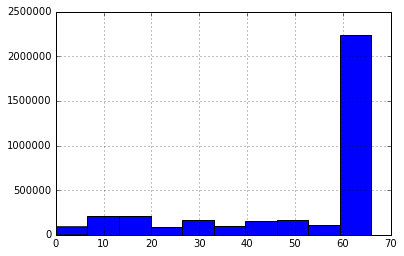

In [6]:
df['planecodes'][df['planecodes'] < 65535].hist()

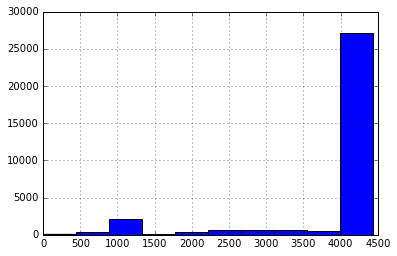

In [7]:
df['zs'][df['segments']==0].hist()

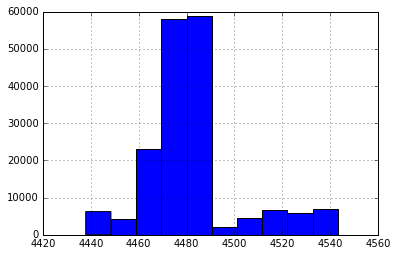

In [8]:
df['zs'][df['segments']==1].hist()

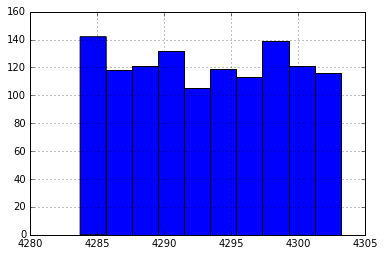

In [9]:
df['zs'][df['planecodes']==1].hist()

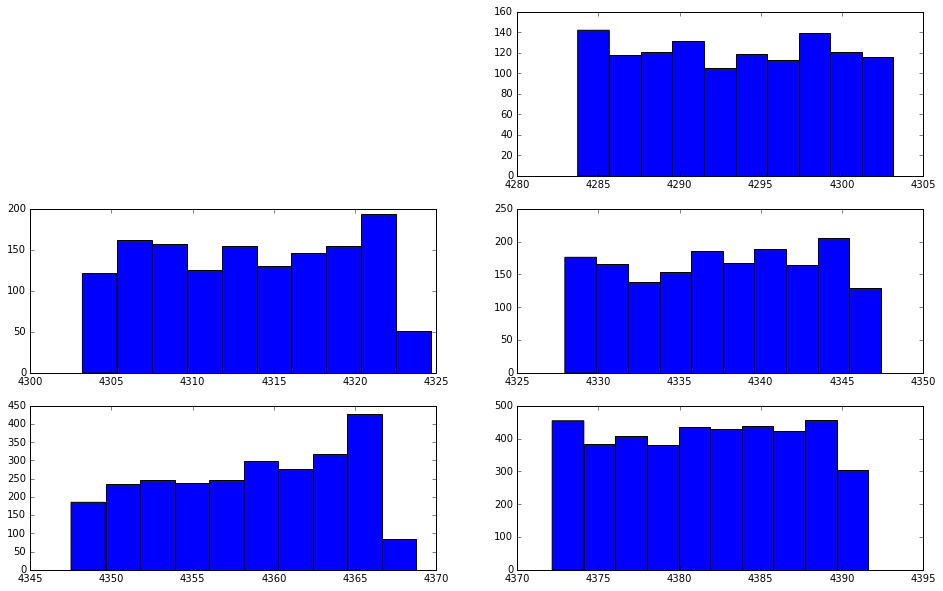

In [10]:
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(3, 2)
for i in range(1, 6):
    ax = plt.subplot(gs[i])
    ax.hist(df['zs'][df['planecodes']==i])

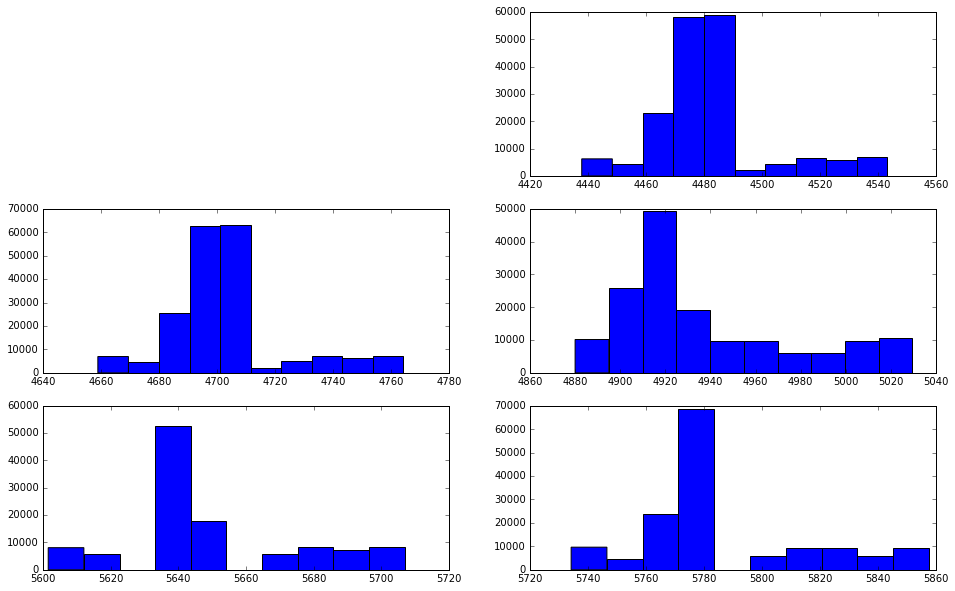

In [11]:
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(3, 2)
for i in range(1, 6):
    ax = plt.subplot(gs[i])
    ax.hist(df['zs'][df['segments']==i])

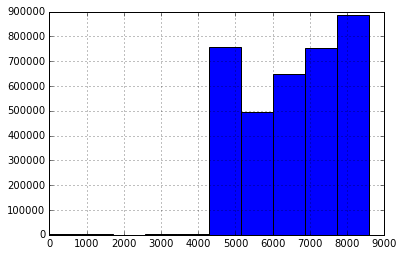

In [12]:
df['zs'].hist()

In [13]:
np.max(df['zs'][df['segments']==0])

4437.8198

In [14]:
# old style...
#target1_z = 4481.21
#target2_z = 4702.29
#target3_z = 4923.36
#target4_z = 5644.91
#target5_z = 5777.55
#target1_thickestW = 25.75
#target2_thickestW = 25.75
#target3_thickestW = 76.3
#target4_thickestW = 28.0
#target5_thickestW = 13.0
#
#extraToleranceUp=23.0
#extraToleranceDown=40.0
#
#targets_z = [target1_z, target2_z, target3_z, target4_z, target5_z]
#targets_w = [target1_thickestW, target2_thickestW, target3_thickestW, target4_thickestW, target5_thickestW]
#
#targets_zw = zip(targets_z, targets_w) 
#
#targets_bounds = [(t - w / 2.0 - extraToleranceUp, t + w / 2.0 + extraToleranceDown) for (t, w) in targets_zw]

In [15]:
target1_up_trk = 4437.83
target1_dn_trk = 4543.26

target2_up_trk = 4658.9
target2_dn_trk = 4764.33

target3_up_trk = 4879.98
target3_dn_trk = 5029.62

target4_up_trk = 5601.52
target4_dn_trk = 5706.95

target5_up_trk = 5734.17
target5_dn_trk = 5857.6
        
targets_bounds = [
    (target1_up_trk, target1_dn_trk),
    (target2_up_trk, target2_dn_trk),
    (target3_up_trk, target3_dn_trk),
    (target4_up_trk, target4_dn_trk),
    (target5_up_trk, target5_dn_trk),
]

In [16]:
for i, t in enumerate(targets_bounds):
    print i+1, t

1 (4437.83, 4543.26)
2 (4658.9, 4764.33)
3 (4879.98, 5029.62)
4 (5601.52, 5706.95)
5 (5734.17, 5857.6)


In [17]:
for i in range(11):
    print i, (np.min(df['zs'][df['segments']==i]), np.max(df['zs'][df['segments']==i]))

0 (0.0, 4437.8198)
1 (4437.8301, 4543.2598)
2 (4658.8999, 4764.3301)
3 (4879.98, 5029.6201)
4 (5601.52, 5706.9502)
5 (5734.1699, 5857.6001)
6 (4543.2598, 4658.8999)
7 (4764.3301, 4879.98)
8 (5029.6201, 5601.52)
9 (5706.9502, 5734.1699)
10 (5857.6001, 8601.0498)


In [18]:
zsegs = [0, 1, 6, 2, 7, 3, 8, 4, 9, 5, 10]

In [19]:
for i in zsegs:
    print (np.min(df['zs'][df['segments']==i]), np.max(df['zs'][df['segments']==i]))

(0.0, 4437.8198)
(4437.8301, 4543.2598)
(4543.2598, 4658.8999)
(4658.8999, 4764.3301)
(4764.3301, 4879.98)
(4879.98, 5029.6201)
(5029.6201, 5601.52)
(5601.52, 5706.9502)
(5706.9502, 5734.1699)
(5734.1699, 5857.6001)
(5857.6001, 8601.0498)


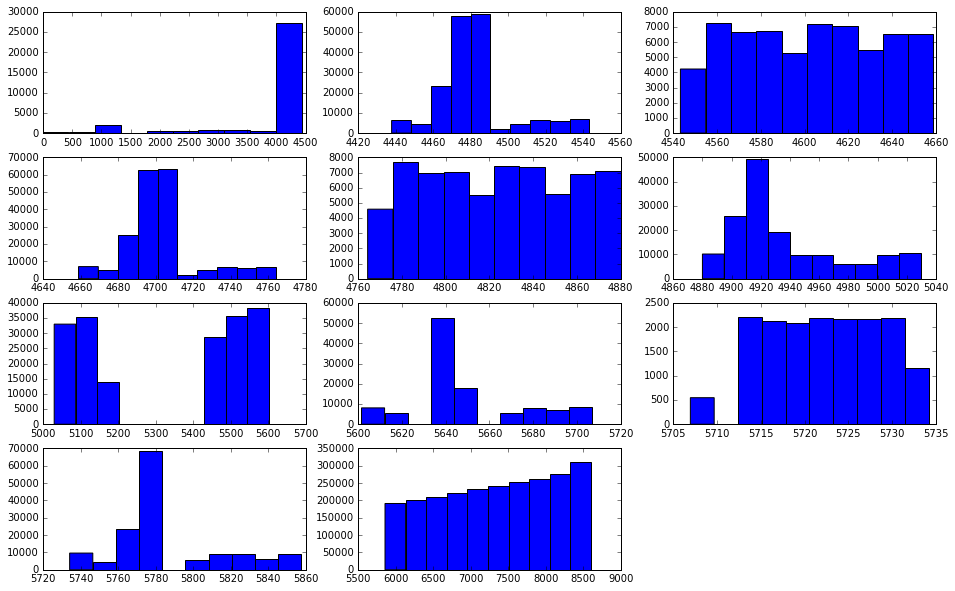

In [20]:
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(4, 3)
for i, v in enumerate(zsegs):
    ax = plt.subplot(gs[i])
    ax.hist(df['zs'][df['segments']==v])

In [26]:
data = {'eventids': f['eventids'], 'zs': f['zs']}
df = DataFrame(data)

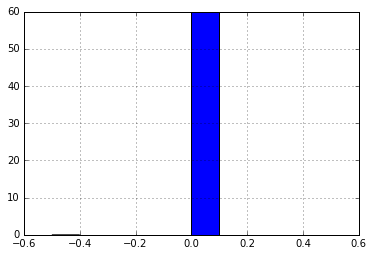

In [23]:
df['eventids'][df['eventids'] < 0.4e15].hist()

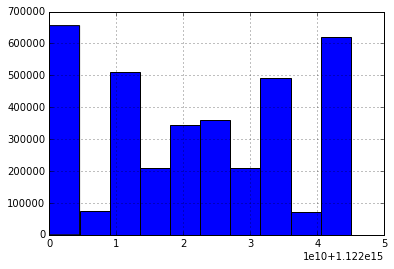

In [24]:
df['eventids'][df['eventids'] > 0.4e15].hist()

In [25]:
df['eventids'][df['eventids'] < 0.4e15]

1199997    0
1224997    0
1249997    0
1274997    0
1299997    0
1324997    0
1349997    0
1374997    0
1399997    0
1424997    0
1449997    0
1474997    0
1499997    0
1524997    0
1549997    0
1574997    0
1599997    0
1624997    0
1649997    0
1674997    0
1699997    0
1724997    0
1749997    0
1774997    0
1799997    0
1824997    0
1849997    0
1874997    0
1899997    0
1924997    0
1949997    0
1974997    0
1999997    0
2024997    0
2049997    0
2074997    0
2099997    0
2124997    0
2149997    0
2174997    0
2199997    0
2224997    0
2249997    0
2274997    0
2299997    0
2324997    0
2349997    0
2374997    0
2399997    0
2424997    0
2449997    0
2474997    0
2499997    0
2524997    0
2549997    0
2574997    0
2599997    0
2624997    0
2649997    0
2674997    0
Name: eventids, dtype: uint64

In [27]:
df['zs'][df['eventids'] < 0.4e15]

1199997    0
1224997    0
1249997    0
1274997    0
1299997    0
1324997    0
1349997    0
1374997    0
1399997    0
1424997    0
1449997    0
1474997    0
1499997    0
1524997    0
1549997    0
1574997    0
1599997    0
1624997    0
1649997    0
1674997    0
1699997    0
1724997    0
1749997    0
1774997    0
1799997    0
1824997    0
1849997    0
1874997    0
1899997    0
1924997    0
1949997    0
1974997    0
1999997    0
2024997    0
2049997    0
2074997    0
2099997    0
2124997    0
2149997    0
2174997    0
2199997    0
2224997    0
2249997    0
2274997    0
2299997    0
2324997    0
2349997    0
2374997    0
2399997    0
2424997    0
2449997    0
2474997    0
2499997    0
2524997    0
2549997    0
2574997    0
2599997    0
2624997    0
2649997    0
2674997    0
Name: zs, dtype: float32

In [29]:
np.max(f['hits-u'][2674997])

0.0